# Introduction to Data Science 
# Lecture 27: Neural Networks II
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll continue discussing Neural Networks. 

Recommended Reading:
* A. Géron, [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) (2022), Ch. 10-13. See also the [associated github page](https://github.com/ageron/handson-ml3).
* I. Goodfellow, Y. Bengio, and A. Courville, [Deep Learning](http://www.deeplearningbook.org/) (2016)
*  [TensorFlow tutorials](https://www.tensorflow.org/tutorials)
*  Y. LeCun, Y. Bengio, and G. Hinton, [Deep learning](https://www.nature.com/articles/nature14539), Nature (2015) 


## Recap: Neural Networks

Last time, we introduced *Neural Networks* and discussed how they can be used for classification and regression.

There are many different *network architectures* for Neural Networks, but our focus is on **Multi-layer Perceptrons**. Here, there is an *input layer*, typically drawn on the left hand side and an *output layer*, typically drawn on the right hand side. The middle layers are called *hidden layers*. 


<img src="Colored_neural_network.svg" title="https://en.wikipedia.org/wiki/Artificial_neural_network#/media/File:Colored_neural_network.svg" 
width="300">

Given a set of features $X = x^0 = \{x_1, x_2, ..., x_n\}$ and a target $y$, a neural network works as follows. 


Each layer applies an affine transformation and an [activation function](https://en.wikipedia.org/wiki/Activation_function) (e.g., ReLU, hyperbolic tangent, or logistic) to the output of the previous layer: 
$$
x^{j} = \sigma ( W^{j} x^{j-1} + b^j ). 
$$
At the $j$-th hidden layer, the input is represented as the composition of $j$ such mappings. An additional function, *e.g.* [softmax](https://en.wikipedia.org/wiki/Softmax_function), is applied to the output layer to give the prediction, $\hat y$, for classification problems. 

<img src="activationFct.png" 
title="see Géron, Ch. 10" 
width="700">


## Softmax function for classificaton 

The *softmax function*, $s:\mathbb{R}^K \to (0,1)^K$ is defined by
$$
s(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
\qquad \qquad \textrm{for } j=1, \ldots, K.
$$
Note that each component is in the range $(0,1)$ and the values sum to 1. We interpret $s(\mathbf{z})_j$ as the probability that $\mathbf{z}$ is a member of class $j$. 

**Example:** Let's say we are classifying images of cats, dogs, and fish, so that our ouput layer is 3 dimensional. 
\begin{align*}
z & = \begin{bmatrix} 20 & 10 & 6 \end{bmatrix} \\
\text{max}(z) & = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix} \\
\text{softmax}(z) & = \begin{bmatrix} 0.999953770678767 & 0.000045397830955 & 0.000000831490278 \end{bmatrix}
\end{align*}

The softmax function behaves similar to the max function, but it's smooth.

## Training a neural network

Neural networks uses a loss function of the form 
$$
Loss(\hat{y},y,W) =  \frac{1}{2} \sum_{i=1}^n g(\hat{y}_i(W),y_i) + \frac{\alpha}{2} \|W\|_2^2
$$
Here, 
+ $y_i$ is the label for the $i$-th example, 
+ $\hat{y}_i(W)$ is the predicted label for the $i$-th example, 
+ $g$ is a function that measures the error, typically $L^2$ difference for regression or cross-entropy for classification, and 
+ $\alpha$ is a regularization parameter. 

Starting from initial random weights, the loss function is minimized by repeatedly updating these weights. Various **optimization methods** can be used, *e.g.*, 
+ gradient descent method 
+ quasi-Newton method,
+ stochastic gradient descent, or 
+ ADAM. 

There are various parameters associated with each method that must be tuned. 

**Back propagation** is a way of using the chain rule from calculus to compute the gradient of the $Loss$ function for optimization. 

## Neural Networks in scikit-learn

In the previous lecture, we used Neural Network implementations in scikit-learn to do both classification and regression:
+ [multi-layer perceptron (MLP) classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
+ [multi-layer perceptron (MLP) regressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)


However, there are several limitations to the scikit-learn implementation: 
- no GPU support
- limited network architectures 

## Neural networks with TensorFlow

Today, we'll use [TensorFlow](https://github.com/tensorflow/tensorflow) to train a Neural Network. 

TensorFlow is an open-source library designed for large-scale machine learning. 

### Installing TensorFlow

Instructions for installing TensorFlow are available at [the tensorflow install page](https://www.tensorflow.org/install).

It is recommended that you use the command: 
```
pip install tensorflow
```


In [20]:
import tensorflow as tf
print(tf.__version__)


2.8.0


TensorFlow represents computations by connecting op (operation) nodes into a computation graph.

<img src="graph.png" 
width="400">

A TensorFlow program previously had two components:
+ In the *construction phase*, a computational graph is built. During this phase, no computations are performed and the variables are not yet initialized. 
+ In the *execution phase*, the graph is evaluated, typically many times. In this phase, each operation is given to a CPU or GPU, variables are initialized, and functions can be evaluted. 
+ However Tensorflow 2 implements [eager execution](https://www.tensorflow.org/guide/eager) which is easier to use and eliminates the need for the user to explicitly define a construction and execution phase. 

For example the following can be directly evaluated:

In [21]:
x = tf.Variable(3)
y = tf.Variable(4)
f = x*x*y + y + 2
print(f.numpy())


42


### Autodiff

TensorFlow can automatically compute the derivative of functions using [```GradientTape```](https://www.tensorflow.org/guide/autodiff). 

In [23]:
# Example: function of 1 variable

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [24]:
# Example: function of 2 variables

x = tf.Variable(3.0)
y = tf.Variable(4.0)

with tf.GradientTape() as tape:
  f = x + 2*y*y + 2
grads = tape.gradient(f, [x,y])
print(grads[0].numpy())
print(grads[1].numpy())

1.0
16.0


This is enormously helpful since training a NN requires the derivate of the loss function with respect to the parameters (and there are a lot of parameters). This is computed using backpropagation (chain rule) and TensorFlow does this work for you. 

### Optimization methods in Keras
Tensorflow also has several built-in optimization methods. Here are the ones available in Keras API:

Other optimization methods in TensorFlow:
+ [```tf.keras.optimizers.Adadelta```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adadelta)
+ [```tf.keras.optimizers.Adagrad```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad)
+ [```tf.keras.optimizers.Adam```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
+ [```tf.keras.optimizers.Adamax```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adamax)
+ [```tf.keras.optimizers.Ftrl```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Ftrl)
+ [```tf.keras.optimizers.Nadam```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam)
+ [```tf.keras.optimizers.RMSprop```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop)
+ [```tf.keras.optimizers.SGD```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)

For more information, see the [Keras webpage](https://keras.io/api/optimizers/). 


Let's see how to use the stochastic gradient descent optimizer [```tf.keras.optimizers.SGD```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD). 

In [28]:
def fu(x1, x2): 
    return x1 ** 2.0 - x1 * 3  + x2 ** 2
def fu_minimzie():
    return x1 ** 2.0 - x1 * 3  + x2 ** 2
def reset():
    x1 = tf.Variable(10.0) 
    x2 = tf.Variable(10.0) 
    return x1, x2

x1, x2 = reset()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
for i in range(50):
    print ('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f}'.format(fu(x1, x2).numpy(), x1.numpy(), x2.numpy()))
    opt.minimize(fu_minimzie, var_list=[x1, x2])

y = 170.0, x1 = 10.0, x2 = 10.0
y = 108.0, x1 = 8.3, x2 = 8.0
y = 68.3, x1 = 6.9, x2 = 6.4
y = 42.9, x1 = 5.9, x2 = 5.1
y = 26.6, x1 = 5.0, x2 = 4.1
y = 16.2, x1 = 4.3, x2 = 3.3
y = 9.6, x1 = 3.7, x2 = 2.6
y = 5.3, x1 = 3.3, x2 = 2.1
y = 2.6, x1 = 2.9, x2 = 1.7
y = 0.9, x1 = 2.6, x2 = 1.3
y = -0.3, x1 = 2.4, x2 = 1.1
y = -1.0, x1 = 2.2, x2 = 0.9
y = -1.4, x1 = 2.1, x2 = 0.7
y = -1.7, x1 = 2.0, x2 = 0.5
y = -1.9, x1 = 1.9, x2 = 0.4
y = -2.0, x1 = 1.8, x2 = 0.4
y = -2.1, x1 = 1.7, x2 = 0.3
y = -2.2, x1 = 1.7, x2 = 0.2
y = -2.2, x1 = 1.7, x2 = 0.2
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 =

Let's try using another optimizer: [```tf.keras.optimizers.Adam```](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam). You may have to adjust the learning rate to get good results.

In [38]:
def fu(x1, x2): 
    return x1*x1 + 10*x2*x2
def fu_minimzie():
    return x1*x1 + 10*x2*x2
def reset():
    x1 = tf.Variable(3.0) 
    x2 = tf.Variable(2.0) 
    return x1, x2

x1, x2 = reset()
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
for i in range(300):
    print ('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f}'.format(fu(x1, x2).numpy(), x1.numpy(), x2.numpy()))
    opt.minimize(fu_minimzie, var_list=[x1, x2])
        

y = 49.0, x1 = 3.0, x2 = 2.0
y = 44.5, x1 = 2.9, x2 = 1.9
y = 40.2, x1 = 2.8, x2 = 1.8
y = 36.2, x1 = 2.7, x2 = 1.7
y = 32.4, x1 = 2.6, x2 = 1.6
y = 28.8, x1 = 2.5, x2 = 1.5
y = 25.5, x1 = 2.4, x2 = 1.4
y = 22.4, x1 = 2.3, x2 = 1.3
y = 19.6, x1 = 2.2, x2 = 1.2
y = 16.9, x1 = 2.1, x2 = 1.1
y = 14.6, x1 = 2.0, x2 = 1.0
y = 12.4, x1 = 1.9, x2 = 0.9
y = 10.4, x1 = 1.8, x2 = 0.8
y = 8.7, x1 = 1.7, x2 = 0.8
y = 7.2, x1 = 1.6, x2 = 0.7
y = 5.9, x1 = 1.5, x2 = 0.6
y = 4.7, x1 = 1.5, x2 = 0.5
y = 3.7, x1 = 1.4, x2 = 0.4
y = 2.9, x1 = 1.3, x2 = 0.4
y = 2.3, x1 = 1.2, x2 = 0.3
y = 1.7, x1 = 1.1, x2 = 0.2
y = 1.3, x1 = 1.0, x2 = 0.2
y = 1.0, x1 = 1.0, x2 = 0.1
y = 0.8, x1 = 0.9, x2 = 0.0
y = 0.7, x1 = 0.8, x2 = -0.0
y = 0.6, x1 = 0.7, x2 = -0.0
y = 0.5, x1 = 0.7, x2 = -0.1
y = 0.5, x1 = 0.6, x2 = -0.1
y = 0.5, x1 = 0.5, x2 = -0.2
y = 0.6, x1 = 0.5, x2 = -0.2
y = 0.6, x1 = 0.4, x2 = -0.2
y = 0.6, x1 = 0.4, x2 = -0.2
y = 0.7, x1 = 0.3, x2 = -0.2
y = 0.7, x1 = 0.3, x2 = -0.2
y = 0.7, x1 = 0.2, x2 = -

**Exercise:** Change the optimizer to SGD and increase the learning rate. What can go wrong if the learning rate is too large? Note this can occur even for a nice, convex function as above.

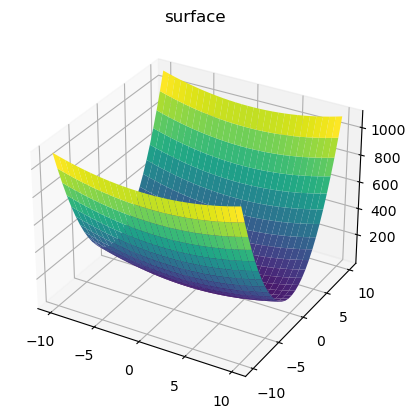

In [39]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = fu(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

## Classifying MNIST using TensorFlow's Keras API 

We now use TensorFlow to classify the handwritten digits in the MNIST dataset.  We'll use TensorFlow's Keras API to build a NN for the MNIST dataset. 

[Keras](https://keras.io/) is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. We'll use it with TensorFlow. 

+ Here the images are 28x28 and there are 10 classes (each corresponding to a digit). We'll choose 2 hidden layers, with 300 and 100 neurons respectively. 

+ With Keras we can build the NN sequentially by combining layers. We specify the type and size of each layer.

+ We can start with a "flattening" layer to vectorize the input data.

+ The loss function is cross entropy. 


In [8]:
import tensorflow as tf
import numpy as np   
from sklearn.metrics import confusion_matrix

In [9]:
# load the data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
# choose NN architechture

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Define the loss function and optimization parameters:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

At each *epoch*, the code breaks the training batch into mini-batches of size 50. Cycling through the mini-batches, it trains the NN. 

In [12]:
# Train the model:

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9387
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0558 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9883


Because we didn't apply the softmax, the model output isn't constrained to be in the interval (0,1). These values are referred to as *logits* in the tensorflow documentation. We need to apply a softmax to convert to a probability distribution. For example let's look at one of the test data points:

In [13]:
# Logits corresponding to first test data point:
model_output = model(x_test[:1]).numpy()
print(model_output)

# These logits can also be accessed with model.predict:
model_prediction = model.predict(x_test[:1])
print(model_prediction)

# Apply softmax to obtain probability distribution corresponding to first test data point:
softmax_model_output = tf.nn.softmax(model_output).numpy()
print(softmax_model_output)

# Apply argmax to obtain a hard classification rule:
class_prediction = np.argmax(model_output)
print(class_prediction)

[[ -8.933118   -2.3340926  -1.1818466   4.083718   -9.221124   -5.548438
  -20.866299   15.508806   -4.0787916  -1.372583 ]]
[[ -8.933118   -2.3340926  -1.1818466   4.083718   -9.221124   -5.548438
  -20.866299   15.508806   -4.0787916  -1.372583 ]]
[[2.4266218e-11 1.7820609e-08 5.6407494e-08 1.0917977e-05 1.8193769e-11
  7.1606204e-10 1.5939954e-16 9.9998903e-01 3.1132212e-09 4.6612335e-08]]
7


In [14]:
# Evaluate the model on the test data:

model.evaluate(x_test,  y_test, verbose=2)

# Note: the model outputs a probability distribution, but if we want to make a confusion matrix then we can 
# use the argmax function to obtain a unique predicted class for each data point:

y_pred = np.argmax(model.predict(x_test), axis=1)
print(confusion_matrix(y_test,y_pred))


313/313 - 1s - loss: 0.0739 - accuracy: 0.9790 - 561ms/epoch - 2ms/step
[[ 969    0    1    1    0    1    6    1    1    0]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   3    0 1013    7    1    0    2    3    3    0]
 [   0    0    4  991    0    9    0    3    2    1]
 [   1    2    8    0  949    1    4    3    2   12]
 [   2    1    0    6    1  871    7    1    3    0]
 [   0    2    2    1    1    2  947    0    3    0]
 [   2    1   13    1    0    0    0 1008    1    2]
 [   2    0    2    6    0    3    1    3  954    3]
 [   2    5    0    7    5    8    1    8    9  964]]


**Note:** Although one could add a softmax activation to the output layer (one then needs to specify from_logits=False when defining the loss), this isn't recommended for numerical stability reasons. However here's how one would adjust the above code if you really want to do it:

In [15]:
# choose NN architechture
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Train the model:
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test data:
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2075 - accuracy: 0.9374
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9890
313/313 - 0s - loss: 0.0909 - accuracy: 0.9751 - 459ms/epoch - 1ms/step


[0.09092822670936584, 0.9750999808311462]

Let's try adding a dropout layer:

In [16]:
# choose NN architechture
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10)
])

# Define the loss function and optimization parameters:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model:
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test data:
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2284 - accuracy: 0.9308
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0974 - accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0702 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9858
313/313 - 0s - loss: 0.0986 - accuracy: 0.9696 - 461ms/epoch - 1ms/step


[0.09861808270215988, 0.9696000218391418]

## Using a pre-trained network

There are many examples of pre-trained NN that can be accessed [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications). 
These NN are very large, having been trained on giant computers using massive datasets. 

It can be very useful to initialize a NN using one of these. This is called [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning). 


We'll use a NN that was pretrained for image recognition. This NN was trained on the  [ImageNet](http://www.image-net.org/) project, which contains > 14 million images belonging to > 20,000 classes (synsets). 

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16

In [18]:
vgg_model = tf.keras.applications.VGG16(weights='imagenet',include_top=True)
vgg_model.summary()

# Note:
# weights='imagenet': use weights pre-trained on ImageNet
# include_top: whether to include the 3 fully-connected layers at the top of the network

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
img_path = 'images/scout1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = vgg_model.predict(x)
print('Predicted:', vgg16.decode_predictions(preds, top=5)[0])

Predicted: [('n02098105', 'soft-coated_wheaten_terrier', 0.35541493), ('n02105641', 'Old_English_sheepdog', 0.2371456), ('n02095314', 'wire-haired_fox_terrier', 0.13490725), ('n02091635', 'otterhound', 0.061102822), ('n02093991', 'Irish_terrier', 0.05278944)]


## Some NN topics that we didn't discuss
+ Recurrent neural networks (RNN) for time series
+ How NN can be used for unsupervised learning problems and [Reinforcement learning problems](https://en.wikipedia.org/wiki/Reinforcement_learning) (how agents should act to maximize some notion of cummulative reward).
+ Special layers in NN for image processing 
+ Using Tensorflow on a GPU 

## CPU vs. GPU

[CPUs (Central processing units)](https://en.wikipedia.org/wiki/Central_processing_unit) have just a few cores. The number of processes that a CPU can do in parallel is limited. However, each cores is very fast and is good for sequential tasks. 

[GPUs (Graphics processing units)](https://en.wikipedia.org/wiki/Graphics_processing_unit) have thousands of cores, so can do many processes in parallel. GPU cores are typically slower and are more limited than CPU cores. However, for the right kind of computations (think matrix multiplication), GPUs are very fast. GPUs also have their own memory and caching systems, which further improves the speed of some computations, but also makes GPUs more difficult to program. (You have to use something like [CUDA](https://en.wikipedia.org/wiki/CUDA)).  

TensorFlow can use GPUs to significantly speed up the training NN. See the programmer's guide [here](https://www.tensorflow.org/programmers_guide/using_gpu). 